# Project: Communicate Data Findings: Metro Bike-Share Data
## by: Almutairi, Muhanned

## Overview

> [Metro Bike Share](https://en.wikipedia.org/wiki/Metro_Bike_Share)  is a bicycle sharing system in the Los Angeles, California metropolitan area. The service was launched on July 7, 2016. It is administered by the Los Angeles County Metropolitan Transportation Authority (Metro) and is operated by Bicycle Transit Systems. The system uses a fleet of about 1,400 bikes and includes 93 stations in Downtown Los Angeles, Venice, and the Port of Los Angeles. The dataset used for this exploratory analysis consists of [monthly individual trip data](https://bikeshare.metro.net/about/data/) from January 2019 to December 2019 in CSV format.

> I'm most interested in exploring the bike trips' duration and rental events occurrance patterns, along with how these relate to the riders' characteristics, i.e. their user type,to get a sense of how and what people are using the bike sharing service for. Sample questions to answer: When are most trips taken in terms of day of the week, or month of the year? How long does the average trip take? Does the above depend on if a user is a subscriber or customer?


> Each trip's start date and duration information will help understanding how long a trip usually takes and when. The other information like user type will help us find out who are the main target customer groups, use the different groups to summarize bike usage data to see if there is any special pattern associated with a specific group of riders.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

In [2]:
df = pd.read_csv('trips_clean.csv')

df['start_time'] = pd.to_datetime(df['start_time'])

df['trip_route_category'] = df['trip_route_category'].astype('category')
df['passholder_type'] = df['passholder_type'].astype('category')
df['bike_type'] = df['bike_type'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['month'] = df['month'].astype('category')

df.info(null_counts=True)

/Users/muhanned/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271748 entries, 0 to 271747
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   trip_id              271748 non-null  int64         
 1   duration             271748 non-null  int64         
 2   start_time           271748 non-null  datetime64[ns]
 3   end_time             271748 non-null  object        
 4   start_station        271748 non-null  int64         
 5   start_lat            267464 non-null  float64       
 6   start_lon            267464 non-null  float64       
 7   end_station          271748 non-null  int64         
 8   end_lat              263151 non-null  float64       
 9   end_lon              263151 non-null  float64       
 10  bike_id              271748 non-null  object        
 11  plan_duration        271748 non-null  int64         
 12  trip_route_category  271748 non-null  category      
 13  passholder_typ

## Trips distribution over day of week and month of year.
> Looking in combined with the trip distribution over day of week plot, it is quite obvious that the majority of rides happened on work days (Mon-Fri) and primary usage is probably for commuting. In the 12 months in 2019, August had the most ride trips compared to the others, but overall it was the most popular during summer time (June-October), probably due to the weather in the area.

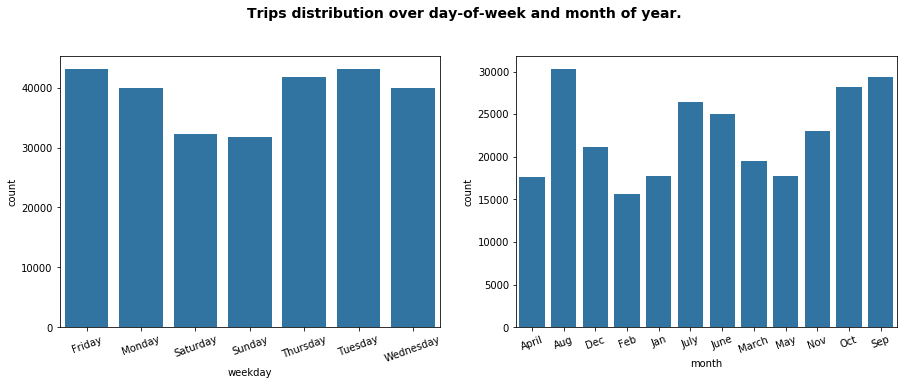

In [3]:
#Getting distribution using Seaborn bar plot 
plt.figure(figsize = [15,5])
base_color=sb.color_palette()[0]

# trip distribution over weekday
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
g=sb.countplot(data = df, x = 'weekday', color=base_color)
plt.xticks(rotation=20)

# trip distribution over months
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
g=sb.countplot(data = df, x = 'month', color=base_color)
plt.xticks(rotation=20);
plt.suptitle('Trips distribution over day-of-week and month of year.', fontsize=14, fontweight='semibold', y=1.015);

## Trips distribution over other categories.
> The figures above show that the users who have monthly pass are the main end-users with the highest trips per year. And more than half of the total trips were done by using a standard type of bikes. Indeed, More than two-third of trips were booked a one-way trip, larger than a round trip.

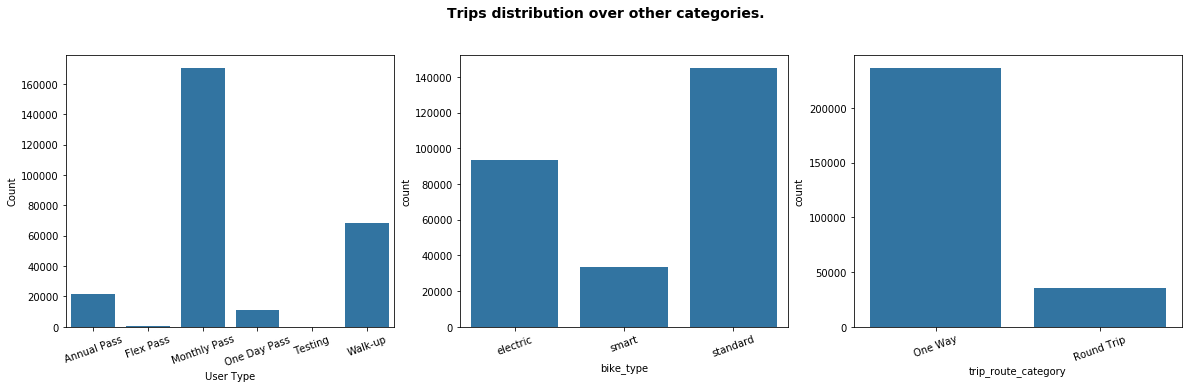

In [4]:
plt.figure(figsize = [20,5])
# trip distribution over weekday
plt.subplot(1, 3, 1) # 1 row, 2 cols, subplot 1
g=sb.countplot(data = df, x = 'passholder_type', color=base_color)
plt.xlabel('User Type');
plt.ylabel('Count');
plt.xticks(rotation=20)

# trip distribution over months
plt.subplot(1, 3, 2) # 1 row, 2 cols, subplot 2
g=sb.countplot(data = df, x = 'bike_type', color=base_color)
plt.xticks(rotation=20);

plt.subplot(1, 3, 3) # 1 row, 2 cols, subplot 2
g=sb.countplot(data = df, x = 'trip_route_category', color=base_color)
plt.xticks(rotation=20);
plt.suptitle('Trips distribution over other categories.', fontsize=14, fontweight='semibold', y=1.015);

## Average trip duration by month/ weekday
> The riding trips are much shorter on Monday through Friday compared to weekends. It indicates a pretty stable and efficient usage of the sharing system on normal workdays, while more casual flexible use on weekends. 

> Starting from January, the average usage time has shown an increasing trend almost all the way till October. The average longest trips happened during the summer months, around June, and July, and, which probably has a lot to do with the weather in the area. however, the difference was not more than three minutes.

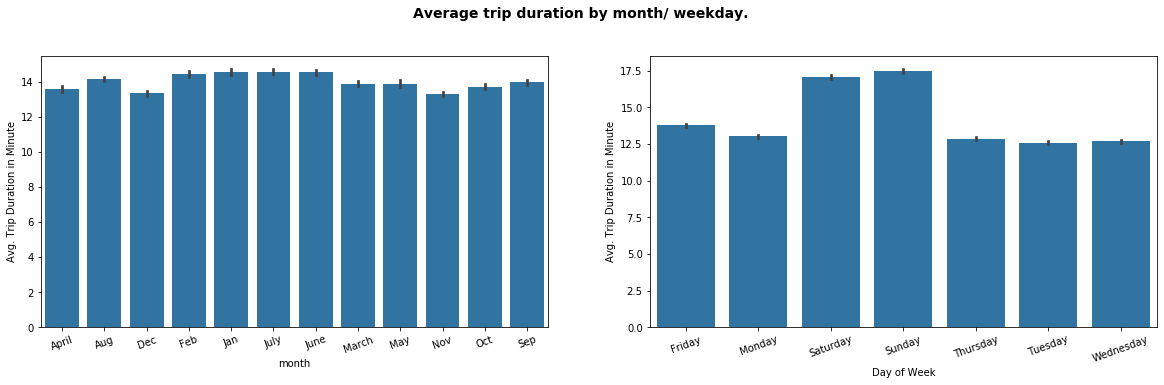

In [5]:
plt.figure(figsize= [20,5])
# trip distribution over months
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 2
sb.barplot(data=df, x='month', y='duration', color=base_color);
plt.ylabel('Avg. Trip Duration in Minute')
plt.xticks(rotation=20);

# trip distribution over months
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
sb.barplot(data=df, x='weekday', y='duration', color=base_color);
plt.xlabel('Day of Week')
plt.ylabel('Avg. Trip Duration in Minute')
plt.xticks(rotation=20);
plt.suptitle('Average trip duration by month/ weekday.', fontsize=14, fontweight='semibold', y=1.015);
plt.show()

## Weekly/annually usage between end-users
> There was much more subscriber usage than casual customers overall. The drop in volume on weekends for monthly-pass holders indicates that they primarily ride bikes for work commute during workdays, whereas almost the opposite pattern of a slight increase of use for a single ride plan (Walk-up) customers on weekends demonstrates that the use was more for leisure/touring and relaxing purposes.  

> All riders for the most have increased the usages during the summer months. The usage was clearly not popular during the winter season like November, December, and January likely due to the weather. as was indicated previously 

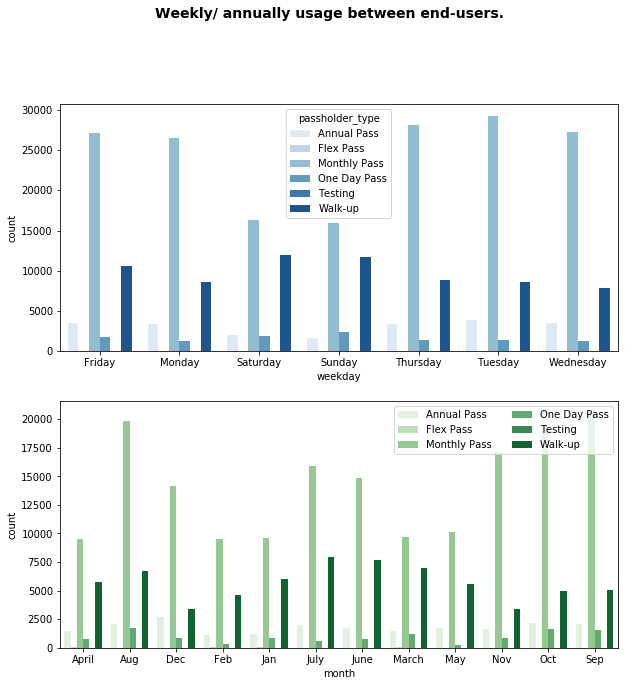

In [6]:
plt.figure(figsize = [10, 10])
# subplot 1: for th weekdays
plt.subplot(2, 1, 1)
sb.countplot(data = df, x = 'weekday', hue = 'passholder_type', palette = 'Blues')
# subplot 2: for the months
ax = plt.subplot(2, 1, 2)
sb.countplot(data = df, x = 'month', hue = 'passholder_type', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.suptitle('Weekly/ annually usage between end-users.', fontsize=14, fontweight='semibold', y=1.015);
plt.show()

## How does the average trip duration vary in weekdays?
> It can be seen from the above plot that users who have annual/monthly/ flex- passes ride much shorter/quicker trips compared to other riders on each day of the week. All user types have an obvious increase in trip duration on Saturdays and Sundays over weekends, especially for casual riders. Royal customer usage seems to be more efficient than others in overall and maintained a very consistent average duration Monday through Friday. 

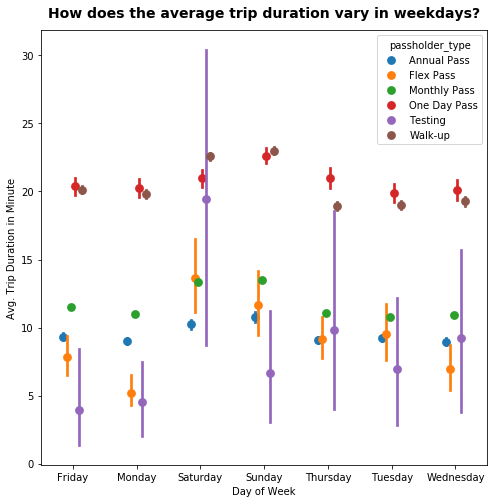

In [8]:
plt.figure(figsize = [8, 8])
sb.pointplot(data=df, x='weekday', y='duration', hue='passholder_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('How does the average trip duration vary in weekdays?', fontsize=14, fontweight='semibold', y=1.015);


## Summary
> I could define the riders into two groups, Royal customers, (annual, and monthly- pass holders) and regular customers (single-pass holders). 

> In general, there were more trips on workdays (Mon-Fri) compared to weekends. Summar time was the most popular season of a year, likely due to the weather. The riding trips tend to be shorter on Monday through Friday compared to weekends. It indicates a pretty stable and efficient usage of the bike-sharing system on normal workdays, while more casual flexible use on weekends.

> The users who have a monthly pass are the main end-users with the highest trips per year. And more than half of the total trips were done by using a standard type of bikes. Indeed, More than two-third of trips were booked a one-way trip, larger than a round trip.

> Different usage patterns/habits between all types of riders are seen from the exploration. Royal customers, (annual, and monthly- pass holders) use the system heavily on workdays i.e. Monday through Friday whereas customers ride a lot on weekends. The efficient/short period of usage for royal customers corresponds to their high concentration on rush hours Monday through Friday, indicating the use is primarily for the work commute. The more relaxing and flexible pattern of customer use shows that they're taking advantage of the bike-sharing system quite different from the regular customers, heavily over weekends, for city tour or leisure purpose probably.
